## Observations and Insights 

In [7]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np

# data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# read mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine into single dataset
mouse_table = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="left")

# display the data table for preview

mouse_table.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [9]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [10]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
# checking the number of mice
mouse_df = mouse_table.loc[:, "Mouse ID"]
mouse_count=mouse_df.count()

print(f'Total Mice: {mouse_count}')

Total Mice: 1893


In [11]:
# find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_and_TP = mouse_table.loc [:, ["Mouse ID", "Timepoint"]]
dup_mouseTP = mouse_and_TP.duplicated

print("Duplicate Rows except first occurrence based on all columns are :")
print(dup_mouseTP)

Duplicate Rows except first occurrence based on all columns are :
<bound method DataFrame.duplicated of      Mouse ID  Timepoint
0        k403          0
1        k403          5
2        k403         10
3        k403         15
4        k403         20
...       ...        ...
1888     z969         25
1889     z969         30
1890     z969         35
1891     z969         40
1892     z969         45

[1893 rows x 2 columns]>


In [12]:
# create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df
mouse_df_clean = mouse_df.drop_duplicates()

In [13]:
# checking the number of mice in the clean DataFrame.
mouse_df_clean_count = mouse_df_clean.count()

print(f'Total Clean Mice: {mouse_df_clean_count}')

Total Clean Mice: 249


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summaryData = mouse_table[["Drug Regimen", "Tumor Volume (mm3)"]]
groupByData = summaryData.groupby(["Drug Regimen"])

# calculations...

summaryDF = pd.DataFrame({
    "Mean": groupByData["Tumor Volume (mm3)"].mean().map('{:.2f}'.format),
    
    "Median": groupByData["Tumor Volume (mm3)"].median().map('{:.2f}'.format),
    
    "Mode": groupByData["Tumor Volume (mm3)"].agg(pd.Series.mode).map('{:.2f}'.format),
    
    "Variance": groupByData["Tumor Volume (mm3)"].var().map('{:.2f}'.format),
    
    "STDEV": groupByData["Tumor Volume (mm3)"].std().map('{:.2f}'.format),
    
    "SEM": groupByData["Tumor Volume (mm3)"].sem().map('{:.2f}'.format)
})

summaryDF.head()

,Mean,Median,Mode,Variance,STDEV,SEM
Drug Regimen,,,,,,
Capomulin,40.68,41.56,45.00,24.95,4.99,0.33
Ceftamin,52.59,51.78,45.00,39.29,6.27,0.47
Infubinol,52.88,51.82,45.00,43.13,6.57,0.49
Ketapril,55.24,53.70,45.00,68.55,8.28,0.60
Naftisol,54.33,52.51,45.00,66.17,8.13,0.60


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summaryDF.head()
# Using the aggregation method, produce the same summary statistics in a single line
mouse_table_grp = mouse_table.groupby(['Drug Regimen'])

summary_agg = mouse_table_grp.agg({'Tumor Volume (mm3)':['mean', 'median', 'var', 'std', 'sem']})
summary_agg.round(2)

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.85  42.35  6.51  0.51
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
mouse_table.groupby("Drug Regimen")
groupByData = mouse_table.groupby("Drug Regimen")
Bar_DF = groupByData["Tumor Volume (mm3)"].mean().to_frame()
Bar_DF.head()

,Tumor Volume (mm3)
Drug Regimen,
Capomulin,40.675741
Ceftamin,52.591172
Infubinol,52.884795
Ketapril,55.235638
Naftisol,54.331565


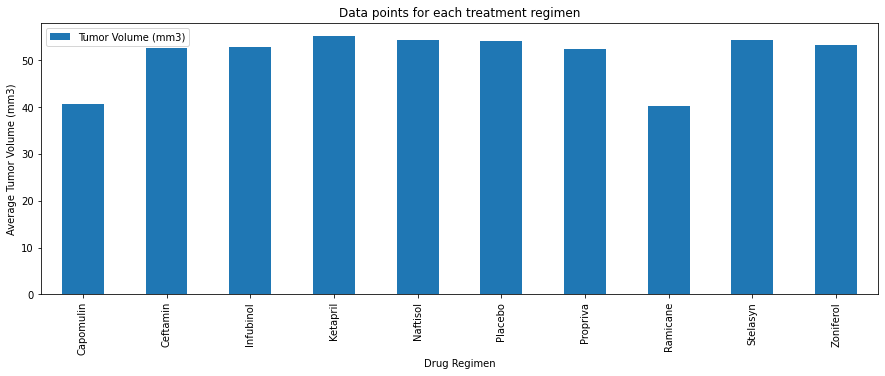

<Figure size 432x288 with 0 Axes>

In [18]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
Bar_DF.plot(kind="bar", figsize=(15,5))

plt.title("Data points for each treatment regimen")

plt.xlabel("Drug Regimen")

plt.ylabel("Average Tumor Volume (mm3)")


# Make it tightttt
plt.show()
plt.tight_layout()

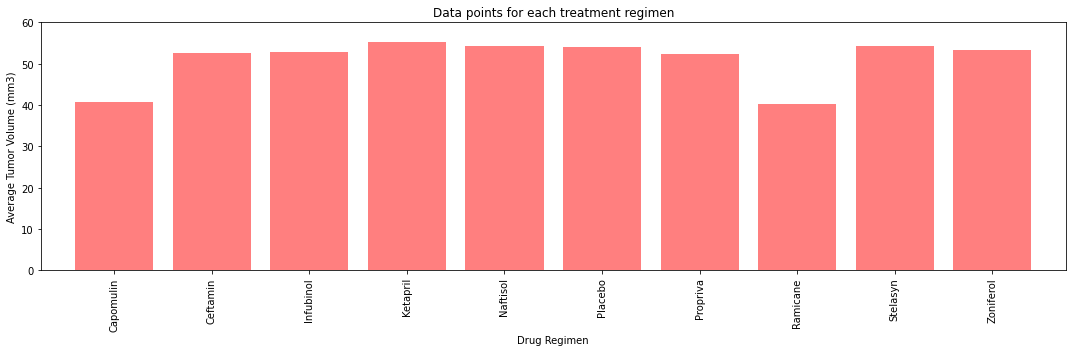

In [30]:

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
xAxis = np.arange(len(Bar_DF))
tickLocations = [value for value in xAxis]

plt.figure(figsize=(15, 5))

plt.bar(xAxis, Bar_DF["Tumor Volume (mm3)"], color='red', alpha=0.5)
plt.xticks(tickLocations, list(Bar_DF.index), rotation="vertical")
plt.xlim(-0.75, len(xAxis) - 0.25)
plt.ylim(0, 60)

plt.title("Data points for each treatment regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Average Tumor Volume (mm3)")


# Makeee it Tight
plt.tight_layout()
plt.show()

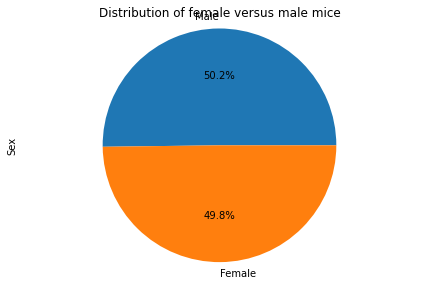

In [33]:

# Generate a pie plot showing the distribution of female versus male mice using pandas
miceCount = mouse_metadata["Sex"].value_counts()
plt.figure()
miceCount.plot(kind="pie", autopct='%1.1f%%')
plt.tight_layout()
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.tight_layout()
plt.show()

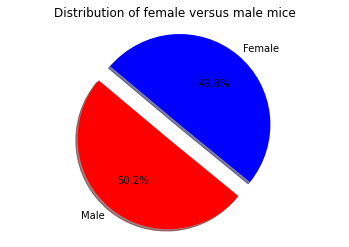

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["red","blue"]
explode = (0.2,0)
plt.figure()
plt.pie(miceCount.values, explode=explode, labels=miceCount.index.values, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [21]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_list = ('Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin')
drug_eval = mouse_table.loc[mouse_table['Drug Regimen'].isin(drug_list)]

# Start by getting the last (greatest) timepoint for each mouse
maxtimepoint = drug_eval.groupby(drug_eval['Mouse ID']).agg({'Timepoint':['max']})
maxtimepoint.columns = ['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
maxtimepoint = maxtimepoint.reset_index()
tumor_vol_final_df = pd.merge(maxtimepoint, mouse_table, how="left", on=["Mouse ID", "Timepoint"])
tumor_vol_final_df.head().round(2)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a275,45,Ceftamin,Female,20,28,63.00,3
3,a411,45,Ramicane,Male,3,22,38.41,1
4,a444,45,Ramicane,Female,10,25,43.05,0


In [23]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# quartile calculations

regimenData = mouse_table[(mouse_table["Drug Regimen"] == "Capomulin") | 
                          (mouse_table["Drug Regimen"] == "Ramicane") | 
                          (mouse_table["Drug Regimen"] == "Infubinol") | 
                          (mouse_table["Drug Regimen"] == "Ceftamin")]

regimenData = regimenData[["Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
regimenData = regimenData.groupby(["Mouse ID", "Drug Regimen"])
regimenDF = regimenData["Tumor Volume (mm3)"].sum().to_frame()

regimenPlot = regimenDF["Tumor Volume (mm3)"]

regimenDF.head()

quartiles = regimenPlot.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Tumor Volume (mm3) is: {lowerq}")
print(f"The upper quartile of Tumor Volume (mm3) is: {upperq}")
print(f"The interquartile range of Tumor Volume (mm3) is: {iqr}")
print(f"The the median of Tumor Volume (mm3) is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Tumor Volume (mm3) is: 340.0010610275
The upper quartile of Tumor Volume (mm3) is: 449.98455965499994
The interquartile range of Tumor Volume (mm3) is: 109.98349862749996
The the median of Tumor Volume (mm3) is: 394.845840265 
Values below 175.02581308625005 could be outliers.
Values above 614.9598075962499 could be outliers.


In [24]:
# Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_list:
    tumor_vol_by_drug = tumor_vol_final_df['Tumor Volume (mm3)'].loc[tumor_vol_final_df['Drug Regimen'] == drug]
# add subset 
    tumor_vol.append(tumor_vol_by_drug)

# Determine outliers using upper and lower bounds
    quartiles = tumor_vol_by_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'For {drug}, Interquartile Range (IQR) is {iqr}')
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'For {drug}, values below {lower_bound} could be outliers')
    print(f'For {drug}, values above {upper_bound} could be outliers\n')

For Capomulin, Interquartile Range (IQR) is 7.781863460000004
For Capomulin, values below 20.70456164999999 could be outliers
For Capomulin, values above 51.83201549 could be outliers

For Ramicane, Interquartile Range (IQR) is 9.098536719999998
For Ramicane, values below 17.912664470000003 could be outliers
For Ramicane, values above 54.30681135 could be outliers

For Infubinol, Interquartile Range (IQR) is 11.477135160000003
For Infubinol, values below 36.83290494999999 could be outliers
For Infubinol, values above 82.74144559000001 could be outliers

For Ceftamin, Interquartile Range (IQR) is 15.577752179999997
For Ceftamin, values below 25.355449580000002 could be outliers
For Ceftamin, values above 87.66645829999999 could be outliers



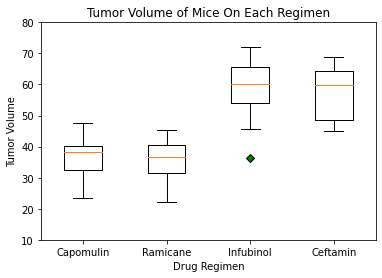

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
green_diamond = dict(markerfacecolor='g', marker='D')
fig1, ax1 = plt.subplots()

# Set title, labels, limits
ax1.set_title('Tumor Volume of Mice On Each Regimen')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume')

ax1.set_ylim(10, 80)
ax1.boxplot(tumor_vol, labels=drug_list, flierprops=green_diamond)
plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

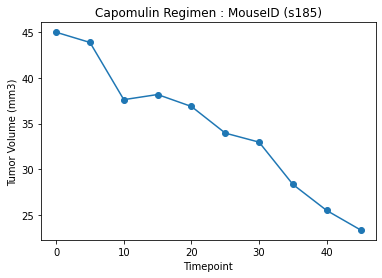

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# isolate a mouse treated with Capomulin
a_mouse = mouse_table[['Timepoint', 'Tumor Volume (mm3)']].loc[(mouse_table['Drug Regimen'] == 'Capomulin') & (mouse_table['Mouse ID']=='s185')]
a_mouse



plt.plot(a_mouse['Timepoint'], a_mouse['Tumor Volume (mm3)'], marker='o')
plt.title("Capomulin Regimen : MouseID (s185)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0, 0.5, 'Avg Tumor Vol (mm3)')

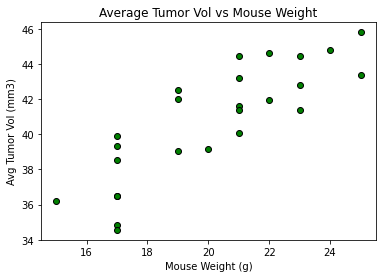

In [27]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
vol_weight = mouse_table[(mouse_table["Drug Regimen"] == "Capomulin")]
vol_weight = vol_weight[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
each_weight = vol_weight.groupby(["Mouse ID", "Weight (g)"])

avg_vol_df = each_weight["Tumor Volume (mm3)"].mean().to_frame()
avg_vol_df = avg_vol_df.reset_index()
#avg_vol_df.head()

plt.scatter(avg_vol_df["Weight (g)"],
            avg_vol_df["Tumor Volume (mm3)"],
            marker = 'o',
            facecolors='green',
            edgecolors='black')

plt.title('Average Tumor Vol vs Mouse Weight')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Avg Tumor Vol (mm3)')

## Correlation and Regression

In [28]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = sts.pearsonr(avg_vol_df["Weight (g)"], avg_vol_df["Tumor Volume (mm3)"])
print(f"The correlation coefficient between both factors is {round(correlation[0],2)}")

The correlation coefficient between both factors is 0.84


The linear regression equation is y = 0.95x + 21.55


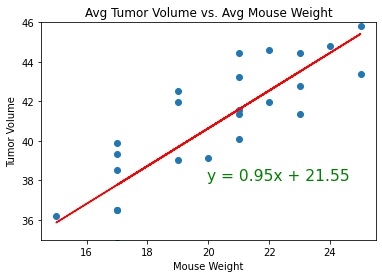

In [29]:
x_values = avg_vol_df['Weight (g)']
y_values = avg_vol_df['Tumor Volume (mm3)']

# linear regression
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(x_values, y_values)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f'The linear regression equation is {line_eq}')

# plot line with scatter
plt.scatter(x_values, y_values)
plt.title('Avg Tumor Volume vs. Avg Mouse Weight')
plt.xlabel('Mouse Weight')
plt.ylabel('Tumor Volume')
plt.ylim(35,46)

# calculate regression values
reg_values = x_values * slope + intercept
plt.plot(x_values, reg_values, "r-")
plt.annotate(line_eq,(19.95,38),fontsize=15.5,color="green")
plt.show()